In [49]:
import pandas as pd
import matplotlib.pyplot as plt

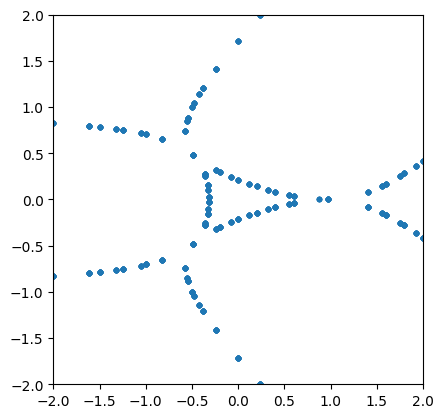

In [66]:
data = pd.read_csv('./original_phase_diagram.csv')
data.drop_duplicates()
x = data['x']
y = data['y']
plt.plot(x,y,'.')
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

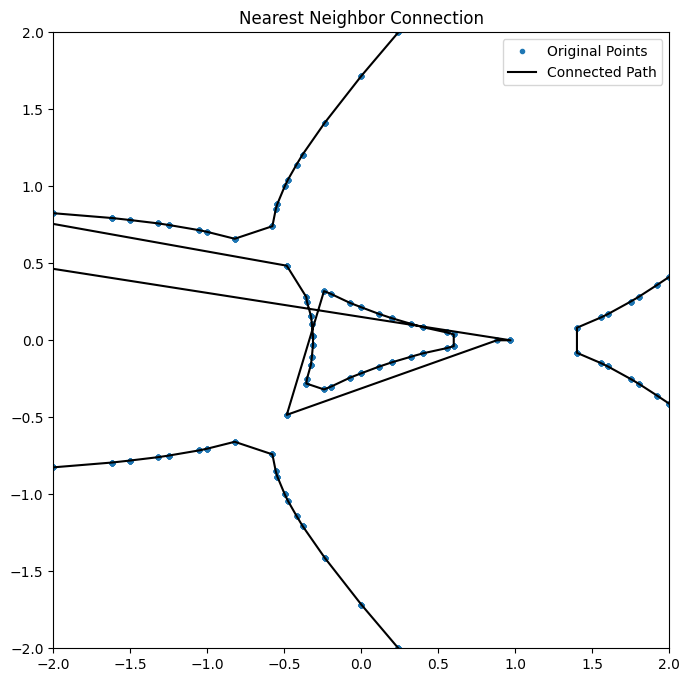

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your uploaded data
data = pd.read_csv('./original_phase_diagram.csv')
x = data['x'].values
y = data['y'].values

# Stack x and y into (N, 2) array of points
points = np.column_stack((x, y))

# Initialize: none visited yet
visited = np.zeros(len(points), dtype=bool)

# Start from the first point
path = [0]
visited[0] = True

# Build the path
for _ in range(1, len(points)):
    last_point = points[path[-1]]
    
    # Compute distances from last point to all others
    dists = np.linalg.norm(points - last_point, axis=1)
    
    # Already visited points are ignored
    dists[visited] = np.inf
    
    # Choose the nearest unvisited point
    next_point = np.argmin(dists)
    
    path.append(next_point)
    visited[next_point] = True

# Create ordered list of points
ordered_points = points[path]

# Plot
plt.figure(figsize=(8,8))
plt.plot(points[:,0], points[:,1], '.', label='Original Points')
plt.plot(ordered_points[:,0], ordered_points[:,1], '-', color='black', label='Connected Path')

plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.title('Nearest Neighbor Connection')
plt.show()
